# Project 2 - Classification
## Credit card default
### This notebook uses the dateset *default_credit_card_clients.xlsx*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2**: Gender (1 = male; 2 = female). 
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4**: Marital status (1 = married; 2 = single; 3 = others). 
- **X5**: Age (year). 
- **X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- **Y**: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the bank business/project stakeholder.

## Initializations and data loading

In [1]:
# Loading packages
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as op



In [2]:
# Loading the dataset and visualizing summary statistics
# Path: 4-MLF_Machine Learning for Finance\Project 2\default_credit_card_clients.xlsx
df = pd.read_excel('default_credit_card_clients.xlsx', engine='openpyxl')
df.head(20)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [3]:
#concatenating name columns with 1st row
df.columns = df.iloc[0]
ds = df.iloc[1:]
ds.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
ds.describe(include='all').T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


1. Business Understanding

In [5]:
"""
#1. Business Understanding

## Dataset description

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6-X11: History of past payment. 
    We tracked the past monthly payment records (from April to September, 2005) as follows: 
        X6 = the repayment status in September, 2005; 
        X7 = the repayment status in August, 2005;
        X8= the repayment status in July, 2005;
        X9= the repayment status in June, 2005;
        X10= the repayment status in May, 2005;
        X11 = the repayment status in April, 2005. 
        The measurement scale for the repayment status is: 
           -1 = pay duly; 
            1 = payment delay for one month; 
            2 = payment delay for two months;
            3 = payment delay for three months;
            4 = payment delay for four months;
            5 = payment delay for five months;
            6 = payment delay for six months;
            7 = payment delay for seven months;
            8 = payment delay for eight months; 
            9 = payment delay for nine months and above. 

- X12-X17: Amount of bill statement (NT dollar). 
    X12 = amount of bill statement in September, 2005; 
    X13 = amount of bill statement in August, 2005;
    X14 = amount of bill statement in July, 2005;
    X15 = amount of bill statement in June, 2005;
    X16 = amount of bill statement in May, 2005; 
    X17 = amount of bill statement in April, 2005. 

- X18-X23: Amount of previous payment (NT dollar). 
    X18 = amount paid in September, 2005; 
    X19 = amount paid in August, 2005;
    X20 = amount paid in July, 2005;
    X21 = amount paid in June, 2005;
    X22 = amount paid in May, 2005;
    X23 = amount paid in April, 2005.

- Y: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

1-Develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.
2-Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.

"""
#change column names 
ds.columns = ['ID','X1_LIMIT_BAL', 'X2_SEX', 'X3_EDUCATION', 'X4_MARRIAGE', 'X5_AGE', 'X6_SEP_PAY', 'X7_AUG_PAY', 'X8_JUL_PAY', 'X9_JUN_PAY', 'X10_MAY_PAY', 'X11_APR_PAY', 'X12_SEP_BILL', 'X13_AUG_BILL', 'X14_JUL_BILL', 'X15_JUN_BILL', 'X16_MAY_BILL', 'X17_APR_BILL', 'X18_SEP_PAY', 'X19_AUG_PAY', 'X20_JUL_PAY', 'X21_JUN_PAY', 'X22_MAY_PAY', 'X23_APR_PAY', 'Y_DEFAULT_NEXT_MONTH']
ds.columns

Index(['ID', 'X1_LIMIT_BAL', 'X2_SEX', 'X3_EDUCATION', 'X4_MARRIAGE', 'X5_AGE',
       'X6_SEP_PAY', 'X7_AUG_PAY', 'X8_JUL_PAY', 'X9_JUN_PAY', 'X10_MAY_PAY',
       'X11_APR_PAY', 'X12_SEP_BILL', 'X13_AUG_BILL', 'X14_JUL_BILL',
       'X15_JUN_BILL', 'X16_MAY_BILL', 'X17_APR_BILL', 'X18_SEP_PAY',
       'X19_AUG_PAY', 'X20_JUL_PAY', 'X21_JUN_PAY', 'X22_MAY_PAY',
       'X23_APR_PAY', 'Y_DEFAULT_NEXT_MONTH'],
      dtype='object')

In [6]:
ds.describe(include='all').T

,count,unique,top,freq
ID,30000,30000,1,1
X1_LIMIT_BAL,30000,81,50000,3365
X2_SEX,30000,2,2,18112
X3_EDUCATION,30000,7,2,14030
X4_MARRIAGE,30000,4,2,15964
X5_AGE,30000,56,29,1605
X6_SEP_PAY,30000,11,0,14737
X7_AUG_PAY,30000,11,0,15730
X8_JUL_PAY,30000,11,0,15764
X9_JUN_PAY,30000,11,0,16455


In [7]:
#CRISP-DM process model
#1. Business Understanding
#2. Data Understanding
#3. Data Preparation
#4. Modeling
#5. Evaluation
#6. Deployment

2. Data Understanding

In [8]:
#The bank wants to use the model the decrease operational losses.

#2. Data Understanding
#The dataset contains 30,000 observations and 25 variables. 
#The dataset is unbalanced with Y 23,364 observations of non-defaulters and 6,636 observations of defaulters.´
#The dataset contains 23 numerical variables and 2 categorical variables.
#numerical variables: X1 = Amount of the given credit (NT dollar), X5 = Age (year), X12-X17 = Amount of bill statement (NT dollar), X18-X23 = Amount of previous payment (NT dollar)
#categorical variables: X2_SEX, X3_EDUCATION, X4_MARRIAGE, X6-X11 = History of past payment, Y_DEFAULT_NEXT_MONTH

#change object to numeric 
ds = ds.apply(pd.to_numeric, errors='ignore')


def to_categorical(df, cols):
    for col in cols:
        df[col] = df[col].astype('category')
    return df

ds = to_categorical (ds, ['X2_SEX', 'X3_EDUCATION', 'X4_MARRIAGE', 'X6_SEP_PAY', 'X7_AUG_PAY', 'X8_JUL_PAY', 'X9_JUN_PAY', 'X10_MAY_PAY', 'X11_APR_PAY', 'Y_DEFAULT_NEXT_MONTH'])
ds.dtypes



ID                         int64
X1_LIMIT_BAL               int64
X2_SEX                  category
X3_EDUCATION            category
X4_MARRIAGE             category
X5_AGE                     int64
X6_SEP_PAY              category
X7_AUG_PAY              category
X8_JUL_PAY              category
X9_JUN_PAY              category
X10_MAY_PAY             category
X11_APR_PAY             category
X12_SEP_BILL               int64
X13_AUG_BILL               int64
X14_JUL_BILL               int64
X15_JUN_BILL               int64
X16_MAY_BILL               int64
X17_APR_BILL               int64
X18_SEP_PAY                int64
X19_AUG_PAY                int64
X20_JUL_PAY                int64
X21_JUN_PAY                int64
X22_MAY_PAY                int64
X23_APR_PAY                int64
Y_DEFAULT_NEXT_MONTH    category
dtype: object

In [9]:
#count 0 values in each column
ds.isin([0]).sum(axis=0)

ID                          0
X1_LIMIT_BAL                0
X2_SEX                      0
X3_EDUCATION               14
X4_MARRIAGE                54
X5_AGE                      0
X6_SEP_PAY              14737
X7_AUG_PAY              15730
X8_JUL_PAY              15764
X9_JUN_PAY              16455
X10_MAY_PAY             16947
X11_APR_PAY             16286
X12_SEP_BILL             2008
X13_AUG_BILL             2506
X14_JUL_BILL             2870
X15_JUN_BILL             3195
X16_MAY_BILL             3506
X17_APR_BILL             4020
X18_SEP_PAY              5249
X19_AUG_PAY              5396
X20_JUL_PAY              5968
X21_JUN_PAY              6408
X22_MAY_PAY              6703
X23_APR_PAY              7173
Y_DEFAULT_NEXT_MONTH    23364
dtype: int64

In [10]:
#drop rows with NaN values
#ds = ds.dropna()
#ds.isin([0]).sum(axis=0)


In [11]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,30000.0,NaN,NaN,NaN,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
X1_LIMIT_BAL,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X2_SEX,30000.0,2.0,2.0,18112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3_EDUCATION,30000.0,7.0,2.0,14030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4_MARRIAGE,30000.0,4.0,2.0,15964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5_AGE,30000.0,NaN,NaN,NaN,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
X6_SEP_PAY,30000.0,11.0,0.0,14737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7_AUG_PAY,30000.0,11.0,0.0,15730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8_JUL_PAY,30000.0,11.0,0.0,15764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X9_JUN_PAY,30000.0,11.0,0.0,16455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ds['X2_SEX'].value_counts()
"""
2    18112  = Female 
1    11888 = Male
Name: X2_SEX, dtype: int64
"""
# The Column X2_SEX contains 18,112 Female  and 11,888 Male observations.
# The Column is balanced.

female_default = ds.loc[(ds['X2_SEX'] == 2) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
#print(female_default)
# 3763 Female defaulters 
print(3763/18112)

male_default = ds.loc[(ds['X2_SEX'] == 1) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
#print(male_default)
#2873 Male defaulters
print(2873/11888)



0.20776280918727916
0.2416722745625841


In [13]:
ds['X3_EDUCATION'].value_counts()
"""
2    14030 = University
1    10585 = Graduate School
3     4917 = High School
5      280 = Others
4      123 = Unknown
6       51 = Unknown
0       14 = Unknown
Name: X3_EDUCATION, dtype: int64
"""
# The Column X3_EDUCATION contains 14,030 University, 10,585 Graduate School, 4,917 High School, 280 Others, 123 Unknown, 51 Unknown, 14 Unknown observations.
# The Column is unbalanced.  




'\n2    14030 = University\n1    10585 = Graduate School\n3     4917 = High School\n5      280 = Others\n4      123 = Unknown\n6       51 = Unknown\n0       14 = Unknown\nName: X3_EDUCATION, dtype: int64\n'

In [14]:
#how many unknown values in X3_EDUCATION column the Y_DEFAULT_NEXT_MONTH column is 1
ds.loc[(ds['X3_EDUCATION'] == 0) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 0 unknown values in X3_EDUCATION [0] column the Y_DEFAULT_NEXT_MONTH column is 1

ds.loc[(ds['X3_EDUCATION'] == 6) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
#8 unknown values in X3_EDUCATION [6] column the Y_DEFAULT_NEXT_MONTH column is 1
ds.loc[(ds['X3_EDUCATION'] == 4) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
#7 unknown values in  column the Y_DEFAULT_NEXT_MONTH column is 1

#drop rows with unknown values in X3_EDUCATION column
ds = ds.drop(ds[ds['X3_EDUCATION'] == 0].index) 
# The Unknown X3_EDUCATION [6] and X3_EDUCATION [4] values  will be replaced with the values will be replaced with the most frequent value.
ds['X3_EDUCATION'].value_counts()

#replace unknown values with the most frequent value
ds['X3_EDUCATION'] = ds['X3_EDUCATION'].replace(6, 2)
ds['X3_EDUCATION'] = ds['X3_EDUCATION'].replace(4, 2)
ds['X3_EDUCATION'].value_counts()

#merge X3_EDUCATION [5] and X3_EDUCATION [3] values
ds['X3_EDUCATION'] = ds['X3_EDUCATION'].replace(5, 3)
ds['X3_EDUCATION'].value_counts()


2    14204
1    10585
3     5197
0        0
Name: X3_EDUCATION, dtype: int64

In [15]:
ds.loc[(ds['X3_EDUCATION'] == 3) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 1237 High School defaulters
ds.loc[(ds['X3_EDUCATION'] == 2) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 3345 University defaulters
ds.loc[(ds['X3_EDUCATION'] == 1) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 2036 Graduate School defaulters

ID                      2036
X1_LIMIT_BAL            2036
X2_SEX                  2036
X3_EDUCATION            2036
X4_MARRIAGE             2036
X5_AGE                  2036
X6_SEP_PAY              2036
X7_AUG_PAY              2036
X8_JUL_PAY              2036
X9_JUN_PAY              2036
X10_MAY_PAY             2036
X11_APR_PAY             2036
X12_SEP_BILL            2036
X13_AUG_BILL            2036
X14_JUL_BILL            2036
X15_JUN_BILL            2036
X16_MAY_BILL            2036
X17_APR_BILL            2036
X18_SEP_PAY             2036
X19_AUG_PAY             2036
X20_JUL_PAY             2036
X21_JUN_PAY             2036
X22_MAY_PAY             2036
X23_APR_PAY             2036
Y_DEFAULT_NEXT_MONTH    2036
dtype: int64

In [16]:
ds['X4_MARRIAGE'].value_counts()
""" 
2    15964 = Married
1    13659 = Single
3      323 = Others
0       54 = Unknown
Name: X4_MARRIAGE, dtype: int64
"""
# The Column X4_MARRIAGE contains 15,964 Married, 13,659 Single, 323 Others, 54 Unknown observations.
# The Column is unbalanced.

#how many unknown values in X4_MARRIAGE column the Y_DEFAULT_NEXT_MONTH column is 1
ds.loc[(ds['X4_MARRIAGE'] == 0) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 5 unknown values in X4_MARRIAGE [0] column the Y_DEFAULT_NEXT_MONTH column is 1
ds.loc[(ds['X4_MARRIAGE'] == 3) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 84 unknown values in X4_MARRIAGE [3] column the Y_DEFAULT_NEXT_MONTH column is 1
ds.loc[(ds['X4_MARRIAGE'] == 1) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 3206 unknown values in X4_MARRIAGE [1] column the Y_DEFAULT_NEXT_MONTH column is 1
ds.loc[(ds['X4_MARRIAGE'] == 2) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 3341 unknown values in X4_MARRIAGE [2] column the Y_DEFAULT_NEXT_MONTH column is 1

#merge X4_MARRIAGE [0] and X4_MARRIAGE [3] values
ds['X4_MARRIAGE'] = ds['X4_MARRIAGE'].replace(0, 3)
ds['X4_MARRIAGE'].value_counts()

ds.loc[(ds['X4_MARRIAGE'] == 3) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 89 unknown values in X4_MARRIAGE [3] column the Y_DEFAULT_NEXT_MONTH column is 1

ID                      89
X1_LIMIT_BAL            89
X2_SEX                  89
X3_EDUCATION            89
X4_MARRIAGE             89
X5_AGE                  89
X6_SEP_PAY              89
X7_AUG_PAY              89
X8_JUL_PAY              89
X9_JUN_PAY              89
X10_MAY_PAY             89
X11_APR_PAY             89
X12_SEP_BILL            89
X13_AUG_BILL            89
X14_JUL_BILL            89
X15_JUN_BILL            89
X16_MAY_BILL            89
X17_APR_BILL            89
X18_SEP_PAY             89
X19_AUG_PAY             89
X20_JUL_PAY             89
X21_JUN_PAY             89
X22_MAY_PAY             89
X23_APR_PAY             89
Y_DEFAULT_NEXT_MONTH    89
dtype: int64

In [17]:
print(ds['Y_DEFAULT_NEXT_MONTH'].value_counts())
print(ds['Y_DEFAULT_NEXT_MONTH'].value_counts(normalize=True))

#Y_DEFAULT_NEXT_MONTH [0] = 0.7788
#Y_DEFAULT_NEXT_MONTH [1] = 0.2212
#The Y_DEFAULT_NEXT_MONTH is imbalanced and we need to balance it before modeling
#to avoid overfitting and underfitting problems in the model 
#we will use SMOTE technique to balance the dataset



0    23350
1     6636
Name: Y_DEFAULT_NEXT_MONTH, dtype: int64
0    0.778697
1    0.221303
Name: Y_DEFAULT_NEXT_MONTH, dtype: float64


In [18]:
# group de category variables and cross tabulate with Y_DEFAULT_NEXT_MONTH

#X3_EDUCATION describe 
ds['X3_EDUCATION'].value_counts()

#X4_MARRIAGE describe
ds['X4_MARRIAGE'].value_counts()

2    15954
1    13655
3      377
Name: X4_MARRIAGE, dtype: int64

In [19]:
#X5_AGE describe
ds['X5_AGE'].describe()
"""
count    29986.000000
mean        35.483926
std          9.218535
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5_AGE, dtype: float64
"""
#group X5_AGE bins intervals based on the describe removing the outliers

ds['X5_AGE'] = pd.cut(ds['X5_AGE'], bins=[20, 28, 34, 41, 79], labels=['20-28', '28-34', '34-41', '41-79'])
ds['X5_AGE'].value_counts()



20-28    8012
28-34    7681
41-79    7446
34-41    6847
Name: X5_AGE, dtype: int64

In [20]:
cross_X5_AGE = pd.crosstab(ds['X5_AGE'], ds['Y_DEFAULT_NEXT_MONTH'])
cross_X5_AGE

Y_DEFAULT_NEXT_MONTH,0,1
X5_AGE,,
20-28,6128,1884
28-34,6194,1487
34-41,5373,1474
41-79,5655,1791


In [21]:
cross_X3_EDUCATION = pd.crosstab(ds['X3_EDUCATION'], ds['Y_DEFAULT_NEXT_MONTH'])
cross_X3_EDUCATION

Y_DEFAULT_NEXT_MONTH,0,1
X3_EDUCATION,,
1,8549,2036
2,10859,3345
3,3942,1255


In [22]:
cross_X4_MARRIAGE = pd.crosstab(ds['X4_MARRIAGE'], ds['Y_DEFAULT_NEXT_MONTH'])
cross_X4_MARRIAGE

Y_DEFAULT_NEXT_MONTH,0,1
X4_MARRIAGE,,
1,10449,3206
2,12613,3341
3,288,89


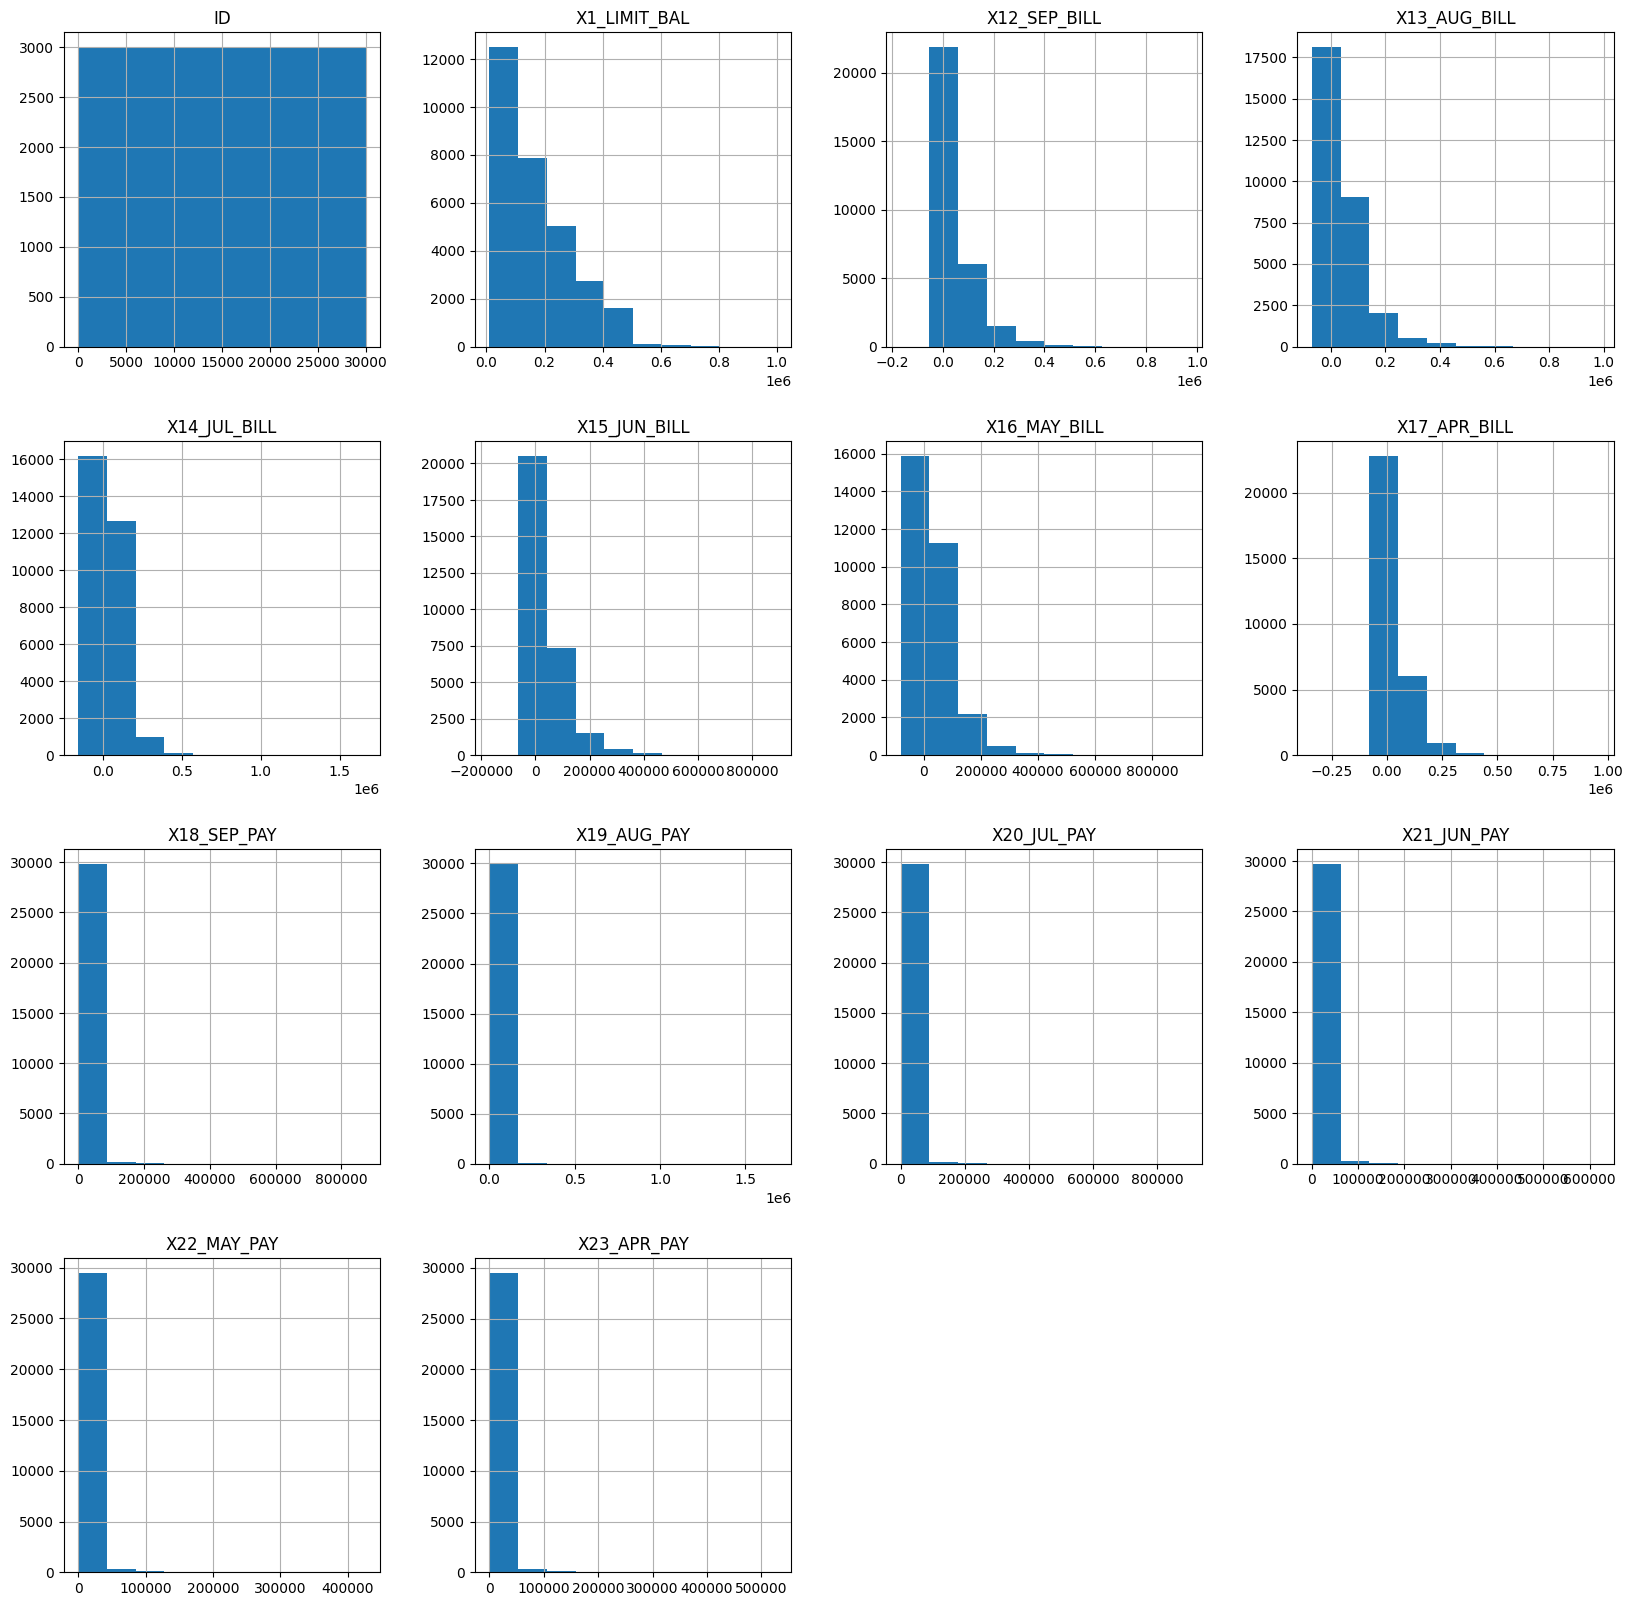

In [23]:
# Do histograms select just  numeric variables

numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

ds[numerical].hist(figsize=(20,20))
plt.show()


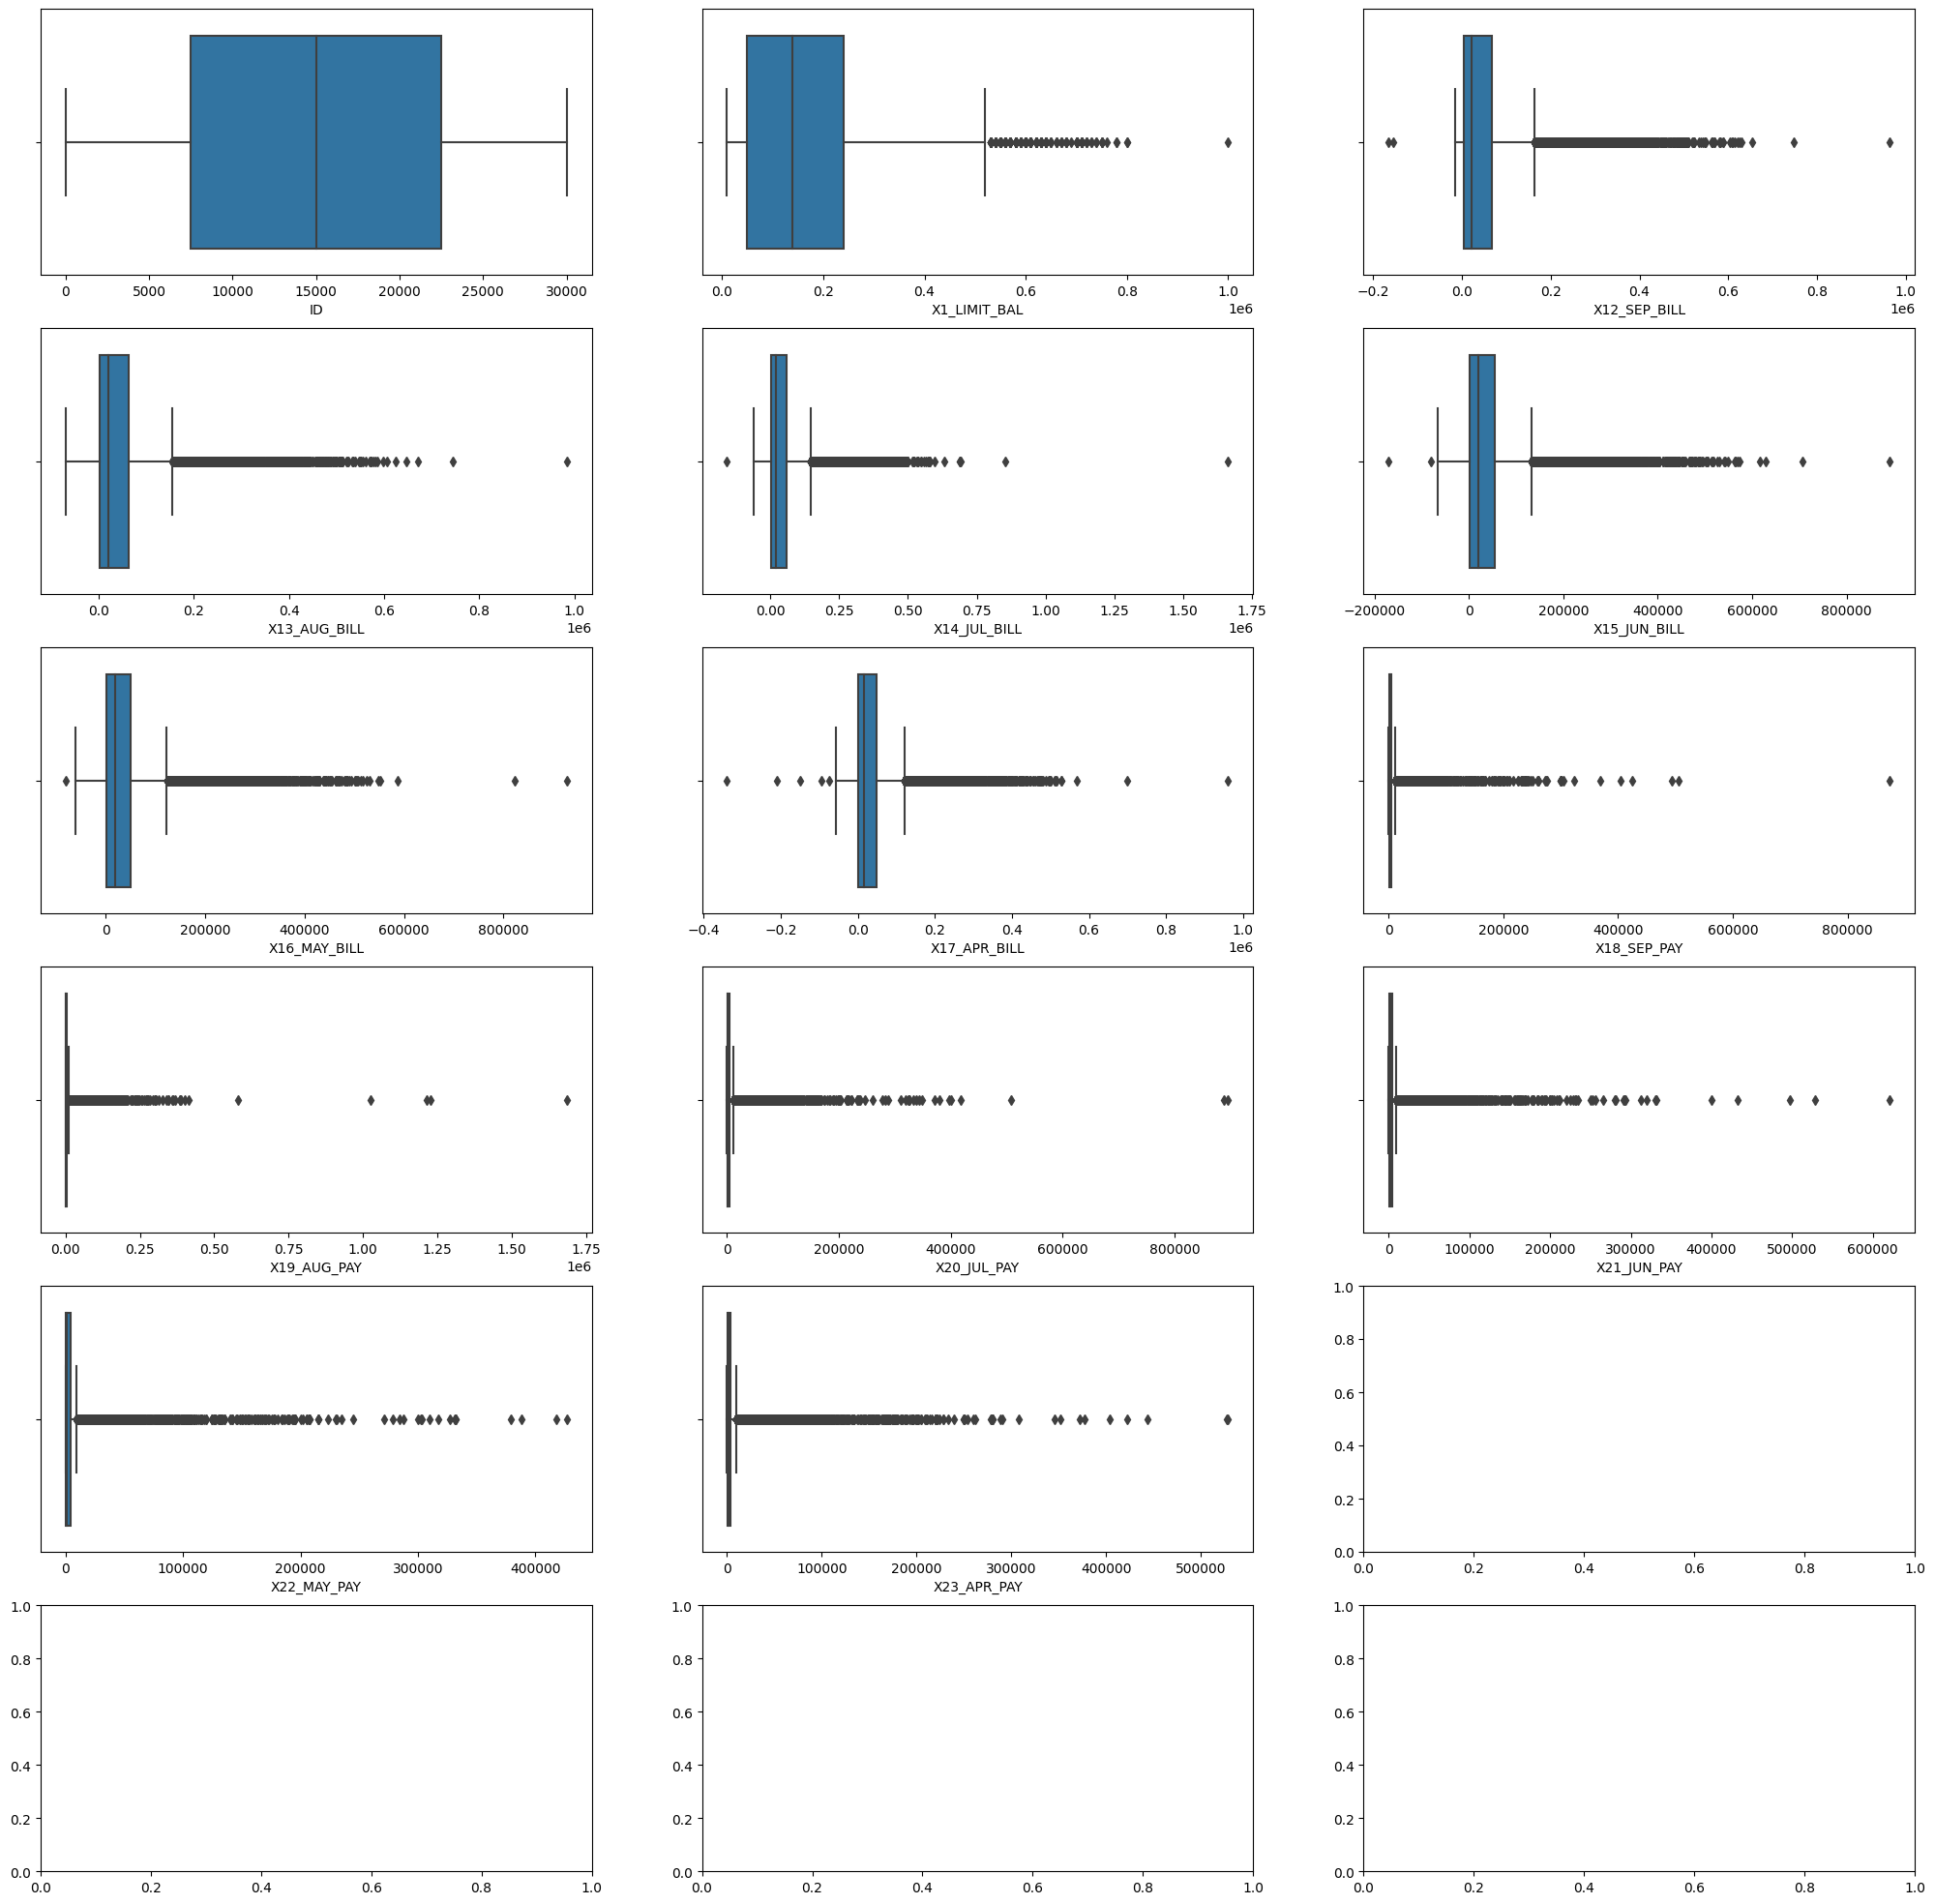

In [24]:
# Do boxplots select just  numeric variables
fig, ax = plt.subplots(6, 3, figsize=(25, 25))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)


In [25]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,29986.0,NaN,NaN,NaN,14999.523811,8660.906006,1.0,7500.25,14997.5,22499.75,30000.0
X1_LIMIT_BAL,29986.0,NaN,NaN,NaN,167461.137864,129760.982745,10000.0,50000.0,140000.0,240000.0,1000000.0
X2_SEX,29986.0,2.0,2.0,18106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3_EDUCATION,29986.0,3.0,2.0,14204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4_MARRIAGE,29986.0,3.0,2.0,15954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5_AGE,29986,4,20-28,8012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6_SEP_PAY,29986.0,11.0,0.0,14733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7_AUG_PAY,29986.0,11.0,0.0,15726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8_JUL_PAY,29986.0,11.0,0.0,15762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X9_JUN_PAY,29986.0,11.0,0.0,16452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


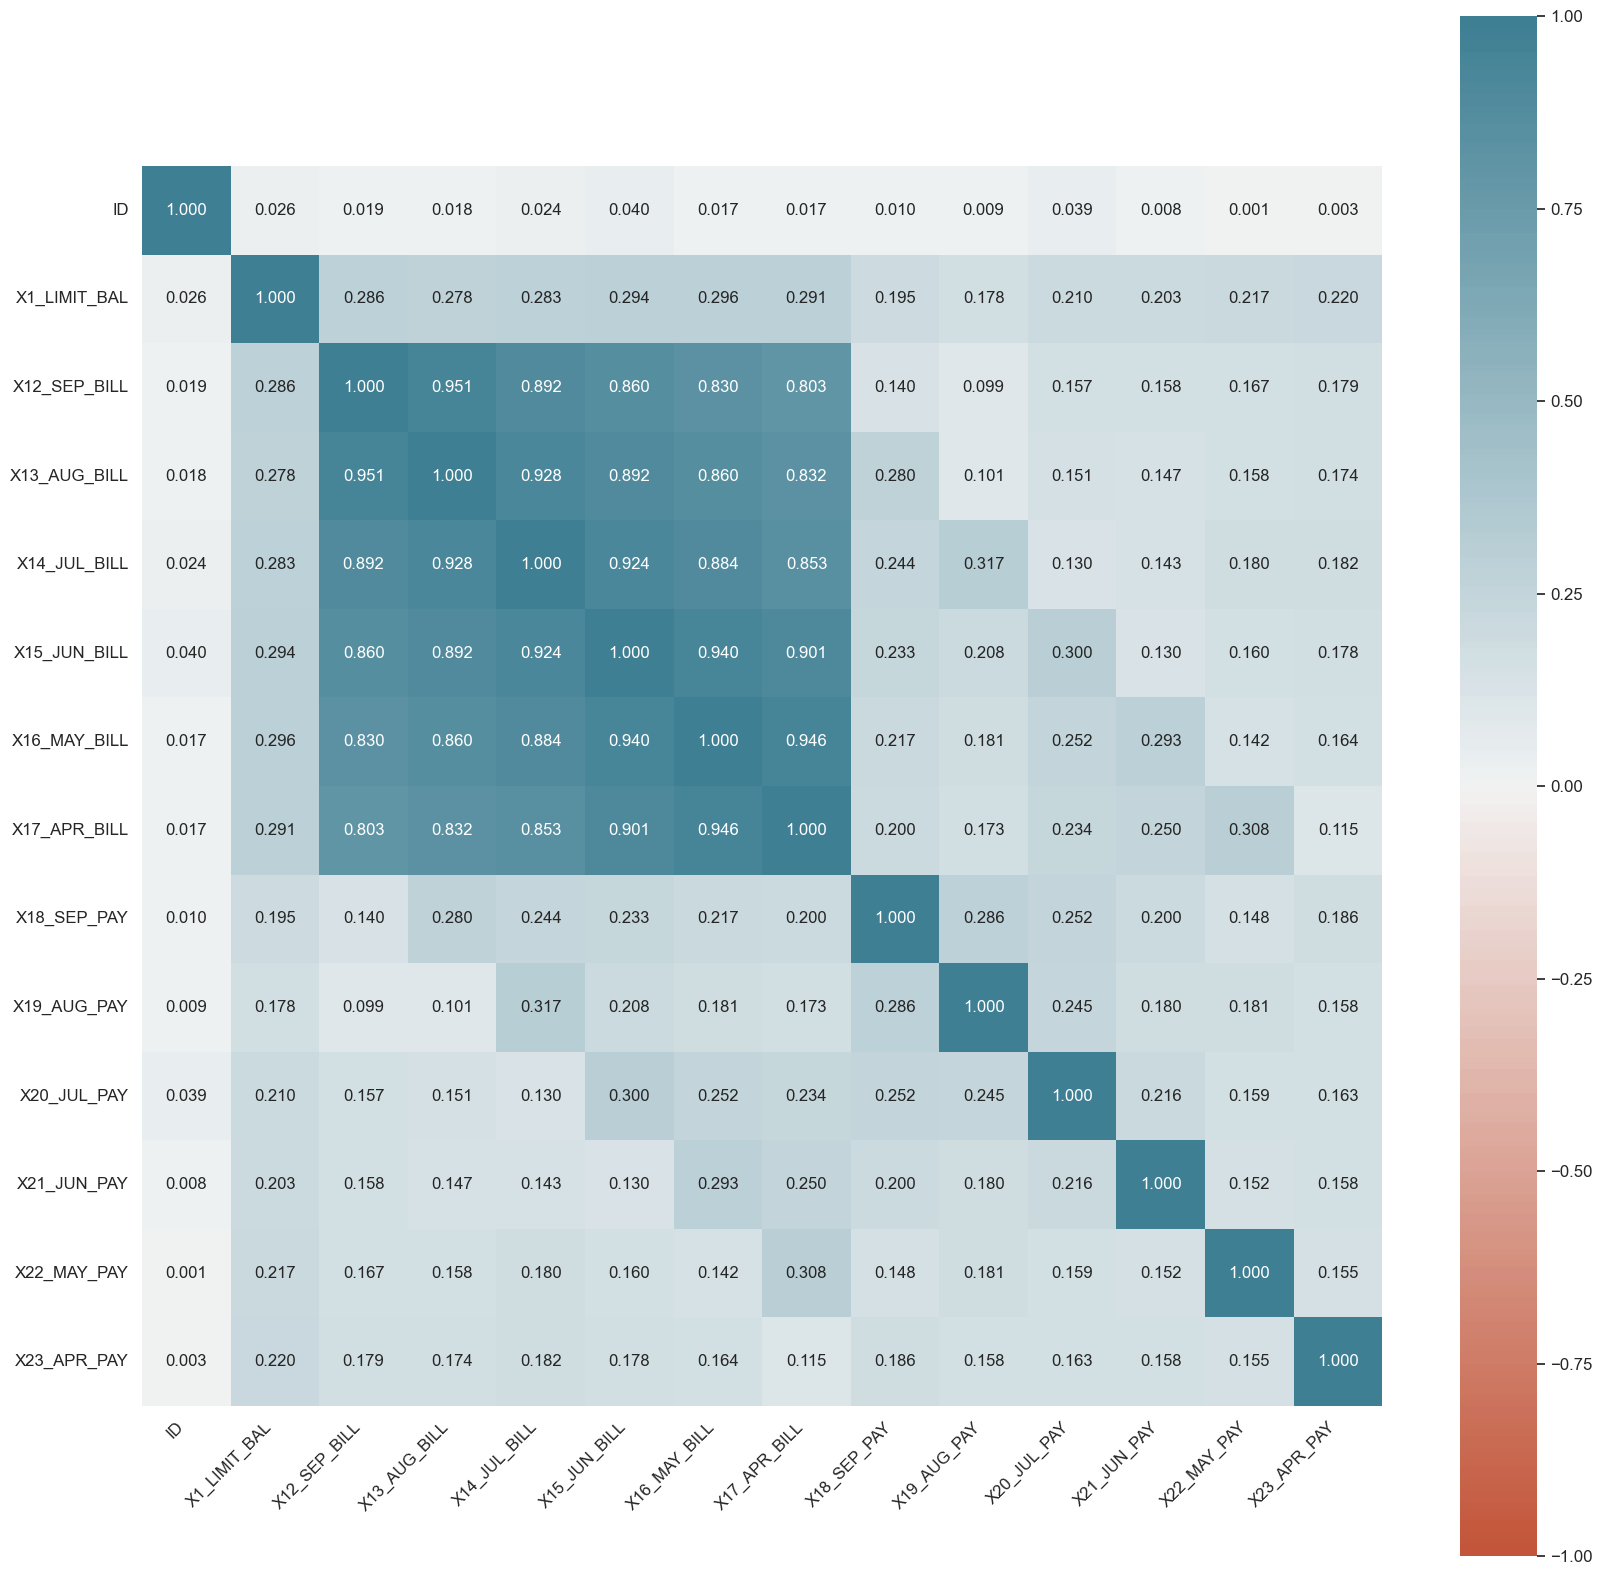

In [26]:
# Plot correlation heatmap of all numeric variables
corr = ds[numerical].corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.1)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12},
    fmt='.3f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [27]:
#correration of all numeric variables 
corr = ds[numerical].corr()
corr.style.background_gradient(cmap='coolwarm')


,ID,X1_LIMIT_BAL,X12_SEP_BILL,X13_AUG_BILL,X14_JUL_BILL,X15_JUN_BILL,X16_MAY_BILL,X17_APR_BILL,X18_SEP_PAY,X19_AUG_PAY,X20_JUL_PAY,X21_JUN_PAY,X22_MAY_PAY,X23_APR_PAY
ID,1.000000,0.026278,0.019449,0.018046,0.024440,0.040412,0.016784,0.016786,0.009779,0.008515,0.039157,0.007863,0.000657,0.003008
X1_LIMIT_BAL,0.026278,1.000000,0.285593,0.278488,0.283351,0.294124,0.295728,0.290580,0.195217,0.178268,0.210065,0.203238,0.217253,0.219666
X12_SEP_BILL,0.019449,0.285593,1.000000,0.951479,0.892296,0.860258,0.829755,0.802626,0.140280,0.099480,0.156948,0.158280,0.167003,0.179323
X13_AUG_BILL,0.018046,0.278488,0.951479,1.000000,0.928341,0.892474,0.859760,0.831570,0.280386,0.100966,0.150795,0.147384,0.157934,0.174236
X14_JUL_BILL,0.024440,0.283351,0.892296,0.928341,1.000000,0.923978,0.883926,0.853326,0.244352,0.316967,0.130034,0.143412,0.179698,0.182321
X15_JUN_BILL,0.040412,0.294124,0.860258,0.892474,0.923978,1.000000,0.940134,0.900937,0.233022,0.207664,0.300073,0.130173,0.160413,0.177622
X16_MAY_BILL,0.016784,0.295728,0.829755,0.859760,0.883926,0.940134,1.000000,0.946194,0.217045,0.181397,0.252395,0.293107,0.141549,0.164161
X17_APR_BILL,0.016786,0.290580,0.802626,0.831570,0.853326,0.900937,0.946194,1.000000,0.200000,0.172809,0.233875,0.250249,0.307716,0.115465
X18_SEP_PAY,0.009779,0.195217,0.140280,0.280386,0.244352,0.233022,0.217045,0.200000,1.000000,0.285615,0.252171,0.199518,0.148469,0.185749
X19_AUG_PAY,0.008515,0.178268,0.099480,0.100966,0.316967,0.207664,0.181397,0.172809,0.285615,1.000000,0.244669,0.180185,0.180974,0.157720


In [28]:
#count values X6_SEP_PAY
ds['X6_SEP_PAY'].value_counts()
"""
 0    14733
-1     5682
 1     3685
-2     2756
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: X6_SEP_PAY, dtype: int64
"""
# see the history of past payments there are default 
ds.loc[(ds['X6_SEP_PAY'] == -2) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 365 defaulters in X6_SEP_PAY [-2] column
ds.loc[(ds['X6_SEP_PAY'] == 0) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 1888 defaulters in X6_SEP_PAY [0] column
ds.loc[(ds['X6_SEP_PAY'] == 1) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 1252 defaulters in X6_SEP_PAY [1] column
ds.loc[(ds['X6_SEP_PAY'] == 2) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 1844 defaulters in X6_SEP_PAY [2] column

#test pay duly [-1]
ds.loc[(ds['X6_SEP_PAY'] == -1) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 954 defaulters in X6_SEP_PAY [-1] column
ds.loc[(ds['X7_AUG_PAY'] == -1) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 966 defaulters in X7_AUG_PAY [-1] column´
ds.loc[(ds['X8_JUL_PAY'] == -1) & (ds['Y_DEFAULT_NEXT_MONTH'] == 1)].count()
# 1009 defaulters in X8_JUL_PAY [-1] column




ID                      926
X1_LIMIT_BAL            926
X2_SEX                  926
X3_EDUCATION            926
X4_MARRIAGE             926
X5_AGE                  926
X6_SEP_PAY              926
X7_AUG_PAY              926
X8_JUL_PAY              926
X9_JUN_PAY              926
X10_MAY_PAY             926
X11_APR_PAY             926
X12_SEP_BILL            926
X13_AUG_BILL            926
X14_JUL_BILL            926
X15_JUN_BILL            926
X16_MAY_BILL            926
X17_APR_BILL            926
X18_SEP_PAY             926
X19_AUG_PAY             926
X20_JUL_PAY             926
X21_JUN_PAY             926
X22_MAY_PAY             926
X23_APR_PAY             926
Y_DEFAULT_NEXT_MONTH    926
dtype: int64

In [29]:
# remove outliers X1_LIMIT_BAL using IQR
Q1 = ds['X1_LIMIT_BAL'].quantile(0.25)
Q3 = ds['X1_LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1
ds_outliers = ds[~((ds['X1_LIMIT_BAL'] < (Q1 - 1.5 * IQR)) |(ds['X1_LIMIT_BAL'] > (Q3 + 1.5 * IQR)))]
print(ds_outliers.shape)

print(ds.shape)


(29819, 25)
(29986, 25)


In [30]:
sns.pairplot(ds_outliers, hue='Y_DEFAULT_NEXT_MONTH', height=2.5)
plt.show()

3. Data Preparation

In [114]:
#3. Data Preparation
#3.1. Data Cleaning

#3.1.1. Missing values


4. Modeling


5. Evaluation

In [ ]:
#5. Evaluation
#6. Deployment